## LOAD DATASET

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_percentage_error as mape
from tensorflow.keras.losses import MeanSquaredError
from statsmodels.tsa.arima.model import ARIMA

In [2]:
def load_dataset (base_url):
    try:
        read_data = pd.read_csv(base_url)
        read_data.info()
        print(f"Successfully reading file from {base_url}")
        return read_data
    except Exception as e:
        print(f"Error reading file from {base_url}: {str(e)}")
        return None

In [3]:
file_url = "https://drive.google.com/uc?export=download&id=1qFeqxx-aYGc4hZ1c59F4dF0IT1XkSCGe"
df = load_dataset(file_url)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
Successfully reading file from https://drive.google.com/uc?export=download&id=1qFeqxx-aYGc4hZ1c59F4dF0IT1XkSCGe


In [4]:
print(f"Total duplicated: ", df.duplicated().sum())
print(f"Total missing values:\n",df.isnull().sum())

Total duplicated:  0
Total missing values:
 order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


## EXPLORE DATA

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [7]:
df.head(20)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-15,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-15,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-15,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-15,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-15,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6,2,thai_ckn_l,1,01-01-15,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7,3,ital_supr_m,1,01-01-15,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8,3,prsc_argla_l,1,01-01-15,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9,4,ital_supr_m,1,01-01-15,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10,5,ital_supr_m,1,01-01-15,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [8]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [9]:
# GROUPING BY ORDER_ID
by_order_id = df.groupby("order_id").count()
by_order_id

,order_details_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
order_id,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1
2,5,5,5,5,5,5,5,5,5,5,5
3,2,2,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
21346,4,4,4,4,4,4,4,4,4,4,4
21347,4,4,4,4,4,4,4,4,4,4,4
21348,3,3,3,3,3,3,3,3,3,3,3


In [10]:
all_numerical = df[['quantity', 'unit_price', 'total_price']]
print(all_numerical)

       quantity  unit_price  total_price
0             1       13.25        13.25
1             1       16.00        16.00
2             1       18.50        18.50
3             1       20.75        20.75
4             1       16.00        16.00
...         ...         ...          ...
48615         1       16.75        16.75
48616         1       17.95        17.95
48617         1       12.00        12.00
48618         1       20.25        20.25
48619         1       12.75        12.75

[48620 rows x 3 columns]


In [11]:
corr_matrix = all_numerical.corr()

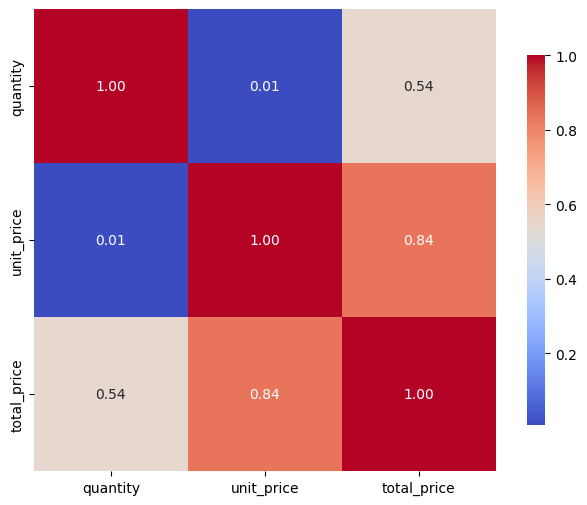

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()


In [13]:
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-15,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-15,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-15,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-15,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-15,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-15,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-15,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-15,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-15,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [14]:
df_grouped = df.groupby(['order_date', 'pizza_name'])['quantity'].sum().reset_index()
df_grouped['order_date'] = pd.to_datetime(df_grouped['order_date'])

C:\Users\Charles\AppData\Local\Temp\ipykernel_4676\3113312378.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_grouped['order_date'] = pd.to_datetime(df_grouped['order_date'])


In [15]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_date  11033 non-null  datetime64[ns]
 1   pizza_name  11033 non-null  object        
 2   quantity    11033 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 258.7+ KB


In [16]:
df_grouped

,order_date,pizza_name,quantity
0,2015-01-01,The Barbecue Chicken Pizza,11
1,2015-01-01,The Big Meat Pizza,5
2,2015-01-01,The Calabrese Pizza,1
3,2015-01-01,The California Chicken Pizza,4
4,2015-01-01,The Chicken Alfredo Pizza,2
...,...,...,...
11028,2015-12-31,The Spinach Pesto Pizza,5
11029,2015-12-31,The Spinach Supreme Pizza,2
11030,2015-12-31,The Spinach and Feta Pizza,5
11031,2015-12-31,The Thai Chicken Pizza,3


In [17]:
df_grouped.pizza_name.unique()

array(['The Barbecue Chicken Pizza', 'The Big Meat Pizza',
       'The Calabrese Pizza', 'The California Chicken Pizza',
       'The Chicken Alfredo Pizza', 'The Chicken Pesto Pizza',
       'The Classic Deluxe Pizza', 'The Five Cheese Pizza',
       'The Four Cheese Pizza', 'The Greek Pizza',
       'The Green Garden Pizza', 'The Hawaiian Pizza',
       'The Italian Capocollo Pizza', 'The Italian Supreme Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Mexicana Pizza', 'The Napolitana Pizza',
       'The Pepper Salami Pizza', 'The Pepperoni Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Prosciutto and Arugula Pizza', 'The Sicilian Pizza',
       'The Soppressata Pizza', 'The Southwest Chicken Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Spinach Supreme Pizza', 'The Spinach and Feta Pizza',
       'The Thai Chicken Pizza', 'The Vegetables + Vegetables Pizza',
       'The Brie Carre Pizza'

## MODELING

### 1. ARIMA

In [18]:
train_dict = {}
test_dict = {}

for pizza_id in df_grouped['pizza_name'].unique():
    df_pizza = df_grouped[df_grouped['pizza_name'] == pizza_id].sort_values('order_date')
    split_idx = int(len(df_pizza) * 0.8)
    
    train_dict[pizza_id] = df_pizza.iloc[:split_idx]
    test_dict[pizza_id] = df_pizza.iloc[split_idx:]

In [19]:
forecast_dict = {}

for pizza_id, train_data in train_dict.items():
    series = train_data.set_index('order_date')['quantity']
    
    try:
        model = ARIMA(series, order=(1,1,1))
        fit = model.fit()
        forecast = fit.forecast(steps=len(test_dict[pizza_id]))  # prediksi sebanyak panjang test
        forecast_dict[pizza_id] = forecast.tolist()
    except:
        forecast_dict[pizza_id] = ['error']


c:\Users\Charles\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Charles\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Charles\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Charles\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported inde

In [20]:
forecast_dict

{'The Barbecue Chicken Pizza': [6.72396265144177,
  6.742630071955404,
  6.742832206606257,
  6.742834395361637,
  6.7428344190619285,
  6.7428344193185605,
  6.74283441932134,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6.74283441932137,
  6

In [21]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for pizza_id in test_dict.keys():
    y_true = test_dict[pizza_id]['quantity']
    y_pred = forecast_dict[pizza_id]
    print(f"{pizza_id} MAPE:", mape(y_true, y_pred))


The Barbecue Chicken Pizza MAPE: 52.253488700383855
The Big Meat Pizza MAPE: 40.90210852135311
The Calabrese Pizza MAPE: 48.46977018981611
The California Chicken Pizza MAPE: 40.92513813730392
The Chicken Alfredo Pizza MAPE: 78.92522488094248
The Chicken Pesto Pizza MAPE: 57.51795410408075
The Classic Deluxe Pizza MAPE: 44.71695677949454
The Five Cheese Pizza MAPE: 57.64772383505578
The Four Cheese Pizza MAPE: 66.593471858137
The Greek Pizza MAPE: 62.54818629093426
The Green Garden Pizza MAPE: 72.17250996270643
The Hawaiian Pizza MAPE: 37.52497800478742
The Italian Capocollo Pizza MAPE: 78.75172027164125
The Italian Supreme Pizza MAPE: 47.09673558313311
The Italian Vegetables Pizza MAPE: 46.02541166103416
The Mediterranean Pizza MAPE: 58.418809808260384
The Mexicana Pizza MAPE: 54.479844467602234
The Napolitana Pizza MAPE: 79.78657403240469
The Pepper Salami Pizza MAPE: 55.36689894827758
The Pepperoni Pizza MAPE: 51.72878056203546
The Pepperoni, Mushroom, and Peppers Pizza MAPE: 74.9223

### 2. LSTM

In [22]:

# 1. Set seed untuk python random
random.seed(1)

# 2. Set seed untuk numpy
np.random.seed(1)

# 3. Set seed untuk tensorflow
tf.random.set_seed(1)


# Fungsi MAPE
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Daftar pizza
pizza_list = [
    'The Barbecue Chicken Pizza',
    'The Big Meat Pizza',
    'The Five Cheese Pizza',
    'The Hawaiian Pizza',
    'The Mexicana Pizza',
    'The California Chicken Pizza',
    'The Classic Deluxe Pizza',
    'The Italian Vegetables Pizza',
    'The Soppressata Pizza',
    'The Brie Carre Pizza'
]

# Jumlah timesteps
n_timesteps = 7

# Loop untuk setiap pizza
for pizza_name in pizza_list:
    print(f"\n📦 Training model untuk: {pizza_name}")

    # Ambil data
    series = df[df['pizza_name'] == pizza_name].sort_values('order_date')['quantity'].values

    # Skip jika data kurang
    if len(series) < n_timesteps + 1:
        print(f"  ⚠️ Data terlalu sedikit untuk {pizza_name}, dilewati.")
        continue

    # Split data
    split_index = int(len(series) * 0.8)
    train_series = series[:split_index]
    test_series = series[split_index:]

    # Buat window untuk training
    X, y = [], []
    for i in range(len(train_series) - n_timesteps):
        X.append(train_series[i:i+n_timesteps])
        y.append(train_series[i+n_timesteps])

    X = np.array(X).reshape(-1, n_timesteps, 1)
    y = np.array(y)

    # Buat dan latih model
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(n_timesteps, 1)),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(64),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss=MeanSquaredError())
    model.fit(X, y, epochs=50, verbose=0)

    # Simpan model
    filename = pizza_name.replace(' ', '_').replace('/', '_') + '-model.h5'
    model.save(filename)
    print(f"  ✅ Model disimpan sebagai: {filename}")

    # Prediksi untuk test set
    input_seq = train_series[-n_timesteps:].reshape((1, n_timesteps, 1))
    preds = []

    for _ in range(len(test_series)):
        pred = model.predict(input_seq, verbose=0)[0][0]
        preds.append(pred)
        input_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)

    # Hitung dan tampilkan MAPE
    error = mape(test_series, preds)
    print(f"  📈 MAPE di test set: {error:.2f}%")


📦 Training model untuk: The Barbecue Chicken Pizza


c:\Users\Charles\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  ✅ Model disimpan sebagai: The_Barbecue_Chicken_Pizza-model.h5
  📈 MAPE di test set: 5.59%

📦 Training model untuk: The Big Meat Pizza


  ✅ Model disimpan sebagai: The_Big_Meat_Pizza-model.h5
  📈 MAPE di test set: 11.55%

📦 Training model untuk: The Five Cheese Pizza


  ✅ Model disimpan sebagai: The_Five_Cheese_Pizza-model.h5
  📈 MAPE di test set: 2.60%

📦 Training model untuk: The Hawaiian Pizza


  ✅ Model disimpan sebagai: The_Hawaiian_Pizza-model.h5
  📈 MAPE di test set: 7.19%

📦 Training model untuk: The Mexicana Pizza


  ✅ Model disimpan sebagai: The_Mexicana_Pizza-model.h5
  📈 MAPE di test set: 2.72%

📦 Training model untuk: The California Chicken Pizza


  ✅ Model disimpan sebagai: The_California_Chicken_Pizza-model.h5
  📈 MAPE di test set: 3.72%

📦 Training model untuk: The Classic Deluxe Pizza


  ✅ Model disimpan sebagai: The_Classic_Deluxe_Pizza-model.h5
  📈 MAPE di test set: 1.42%

📦 Training model untuk: The Italian Vegetables Pizza


  ✅ Model disimpan sebagai: The_Italian_Vegetables_Pizza-model.h5
  📈 MAPE di test set: 4.86%

📦 Training model untuk: The Soppressata Pizza


  ✅ Model disimpan sebagai: The_Soppressata_Pizza-model.h5
  📈 MAPE di test set: 8.16%

📦 Training model untuk: The Brie Carre Pizza


  ✅ Model disimpan sebagai: The_Brie_Carre_Pizza-model.h5
  📈 MAPE di test set: 3.21%


In [23]:
for pizza_name in pizza_list:
    model_filename = pizza_name.replace(' ', '_').replace('/', '_') + '-model.h5'
    model = load_model(model_filename)
    
    print(f"\n📦 Memuat model untuk: {pizza_name}")
    series = df[df['pizza_name'] == pizza_name].sort_values('order_date')['quantity'].values
    if len(series) < n_timesteps + 1:
        print(f"  ⚠️ Data terlalu sedikit untuk {pizza_name}, dilewati.")
        continue
    input_seq = series[-n_timesteps:].reshape((1, n_timesteps, 1))
    preds = []
    for _ in range(30):  # Prediksi 30 hari ke depan
        pred = model.predict(input_seq, verbose=0)[0][0]
        preds.append(pred)
        input_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)
    print(f"  📈 Prediksi 30 hari ke depan untuk {pizza_name}:"
          f" {preds[-30:]}")


📦 Memuat model untuk: The Barbecue Chicken Pizza


  📈 Prediksi 30 hari ke depan untuk The Barbecue Chicken Pizza: [1.0012378, 0.9912225, 1.0172169, 1.0382934, 1.0440938, 1.0499985, 1.0444114, 1.0431705, 1.0425713, 1.0426344, 1.0428281, 1.0429702, 1.0430555, 1.043033, 1.0430145, 1.0430013, 1.0429974, 1.0429978, 1.0429996, 1.043001, 1.0430013, 1.0430012, 1.0430009, 1.0430008, 1.0430009, 1.0430009, 1.0430009, 1.0430008, 1.0430009, 1.0430009]

📦 Memuat model untuk: The Big Meat Pizza
  📈 Prediksi 30 hari ke depan untuk The Big Meat Pizza: [0.95637727, 1.0239078, 1.0140655, 1.0041173, 0.98198396, 1.1362123, 1.1289098, 1.118098, 1.102589, 1.0998194, 1.0983734, 1.0913088, 1.0851234, 1.092803, 1.0968711, 1.0990131, 1.0986205, 1.0978599, 1.0972109, 1.0963719, 1.0954425, 1.0954912, 1.0959289, 1.096396, 1.0966309, 1.0966747, 1.0966195, 1.0965089, 1.096372, 1.0962988]



📦 Memuat model untuk: The Five Cheese Pizza


  📈 Prediksi 30 hari ke depan untuk The Five Cheese Pizza: [0.9940112, 0.9948162, 0.9958883, 0.9969169, 0.99769723, 0.9981328, 0.9982525, 0.9981376, 0.9974375, 0.9970008, 0.99686074, 0.9969521, 0.9971621, 0.997378, 0.99752593, 0.997578, 0.9975089, 0.9973937, 0.9972953, 0.99724704, 0.99725264, 0.99729395, 0.9973452, 0.99738467, 0.99739766, 0.9973871, 0.9973638, 0.99734086, 0.9973275, 0.997326]

📦 Memuat model untuk: The Hawaiian Pizza


  📈 Prediksi 30 hari ke depan untuk The Hawaiian Pizza: [1.043423, 1.0477557, 1.0537442, 1.0383346, 1.0437008, 1.0472789, 1.05037, 1.0537095, 1.054281, 1.0546674, 1.0546243, 1.0556011, 1.056253, 1.0567473, 1.0571004, 1.0572734, 1.0574268, 1.0575671, 1.0577236, 1.0578337, 1.0579158, 1.0579761, 1.0580204, 1.0580585, 1.0580907, 1.0581177, 1.0581379, 1.0581533, 1.0581653, 1.058175]

📦 Memuat model untuk: The Mexicana Pizza


  📈 Prediksi 30 hari ke depan untuk The Mexicana Pizza: [0.96113724, 0.9641664, 0.96951175, 0.97611606, 0.9831743, 0.9881159, 0.9895551, 0.98773986, 0.9823901, 0.97897106, 0.97737986, 0.97766376, 0.9793095, 0.9813645, 0.9829053, 0.9834343, 0.98294467, 0.98198, 0.981035, 0.98046535, 0.9803995, 0.980737, 0.98123854, 0.98165846, 0.98184764, 0.9817946, 0.9815856, 0.9813442, 0.9811746, 0.9811257]

📦 Memuat model untuk: The California Chicken Pizza


  📈 Prediksi 30 hari ke depan untuk The California Chicken Pizza: [1.0237066, 1.0292308, 1.0347672, 1.038723, 1.0282829, 1.0254983, 1.0223129, 1.0201162, 1.0211394, 1.0236422, 1.0255337, 1.0264521, 1.026402, 1.026085, 1.0256101, 1.0249879, 1.0245672, 1.0245777, 1.0248222, 1.0251024, 1.0252833, 1.0253546, 1.0253335, 1.0252438, 1.0251366, 1.0250683, 1.0250543, 1.0250806, 1.0251212, 1.025156]

📦 Memuat model untuk: The Classic Deluxe Pizza


  📈 Prediksi 30 hari ke depan untuk The Classic Deluxe Pizza: [0.9955179, 1.0062318, 0.99719435, 0.98415744, 0.97876775, 0.980021, 1.0103815, 1.0110259, 1.0109837, 1.0105288, 1.0092714, 1.007616, 1.0061648, 1.0052261, 1.0054833, 1.0058051, 1.0061169, 1.0063636, 1.0065039, 1.0065383, 1.0065002, 1.0064315, 1.0063809, 1.0063521, 1.0063426, 1.0063467, 1.0063566, 1.0063666, 1.0063733, 1.0063758]

📦 Memuat model untuk: The Italian Vegetables Pizza


  📈 Prediksi 30 hari ke depan untuk The Italian Vegetables Pizza: [0.9681301, 0.9671296, 0.96573806, 0.96428585, 0.96325564, 0.9619372, 0.9602556, 0.9581691, 0.95787585, 0.95756423, 0.95726085, 0.9569844, 0.9567164, 0.9564785, 0.95630443, 0.95623815, 0.9561751, 0.9561188, 0.95607054, 0.9560307, 0.9560007, 0.95598066, 0.9559679, 0.9559568, 0.9559479, 0.9559406, 0.955935, 0.9559308, 0.9559281, 0.9559258]

📦 Memuat model untuk: The Soppressata Pizza
  📈 Prediksi 30 hari ke depan untuk The Soppressata Pizza: [0.9545647, 0.95537126, 0.95363224, 0.9505836, 0.9471153, 0.9431095, 0.93834496, 0.93288314, 0.9318044, 0.93014824, 0.9283967, 0.92673063, 0.92526734, 0.9241116, 0.92320585, 0.922657, 0.92209876, 0.92160165, 0.92118144, 0.9208385, 0.9205681, 0.9203547, 0.9201863, 0.9200367, 0.9199116, 0.9198092, 0.9197267, 0.91965973, 0.9196054, 0.9195607]



📦 Memuat model untuk: The Brie Carre Pizza
  📈 Prediksi 30 hari ke depan untuk The Brie Carre Pizza: [1.0313013, 1.0239929, 1.016157, 1.0100726, 1.0064422, 1.0052736, 1.0061485, 1.0084052, 1.014111, 1.0157348, 1.0145794, 1.0122967, 1.0101812, 1.0089945, 1.0089574, 1.0098497, 1.0114199, 1.012474, 1.0126117, 1.0120385, 1.0112108, 1.0105574, 1.0103226, 1.0105217, 1.0110066, 1.0114667, 1.0116785, 1.0115997, 1.0113386, 1.0110583]
